In [15]:
import pandas as pd
import mysql.connector
import os
from dotenv import load_dotenv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [16]:

load_dotenv()
conn = None
df = None
try:
    config = {
        'user': os.getenv('DB_USER'), 'password': os.getenv('DB_PASSWORD'),
        'host': os.getenv('DB_HOST'), 'database': os.getenv('DB_NAME'), 'port': 3306,
        'charset': 'utf8mb4'
    }
    conn = mysql.connector.connect(**config)
    query = "SELECT * FROM clientes_para_ml;"
    df = pd.read_sql(query, conn)
    print("Dados carregados com sucesso!")
    display(df.head())
except Exception as e:
    print(f"Ocorreu um erro: {e}")
finally:
    if conn and conn.is_connected():
        conn.close()

Dados carregados com sucesso!


C:\Users\s5059771\AppData\Local\Temp\ipykernel_2232\4177390612.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,renda_mensal,valor_emprestimo,prazo_meses,atrasos_pagamento_hist,motivo_emprestimo,estado_civil,estado,idade,flag_possui_imovel,flag_possui_veiculo,alvo_inadimplente
0,5500.0,20000,36,0,Reforma,Casado(a),SP,39,1,1,0
1,3200.0,8000,24,2,Pagar DÃ­vidas,Solteiro(a),RJ,32,0,1,1
2,8900.0,50000,48,0,Investimento,Casado(a),MG,46,1,1,0
3,2500.0,5000,12,1,EducaÃ§Ã£o,Solteiro(a),BA,25,0,0,1
4,6100.0,15000,24,0,Viagem,Divorciado(a),PR,36,1,0,0


In [17]:
duplicatas = df.duplicated().sum()
ValoresAusentes = df.isnull().sum()
print(f"Foram encontrados o total de {duplicatas} duplicatas.")
print("Valores ausentes por coluna:")
print(ValoresAusentes)


Foram encontrados o total de 0 duplicatas.
Valores ausentes por coluna:
renda_mensal              0
valor_emprestimo          0
prazo_meses               0
atrasos_pagamento_hist    0
motivo_emprestimo         0
estado_civil              0
estado                    0
idade                     0
flag_possui_imovel        0
flag_possui_veiculo       0
alvo_inadimplente         0
dtype: int64


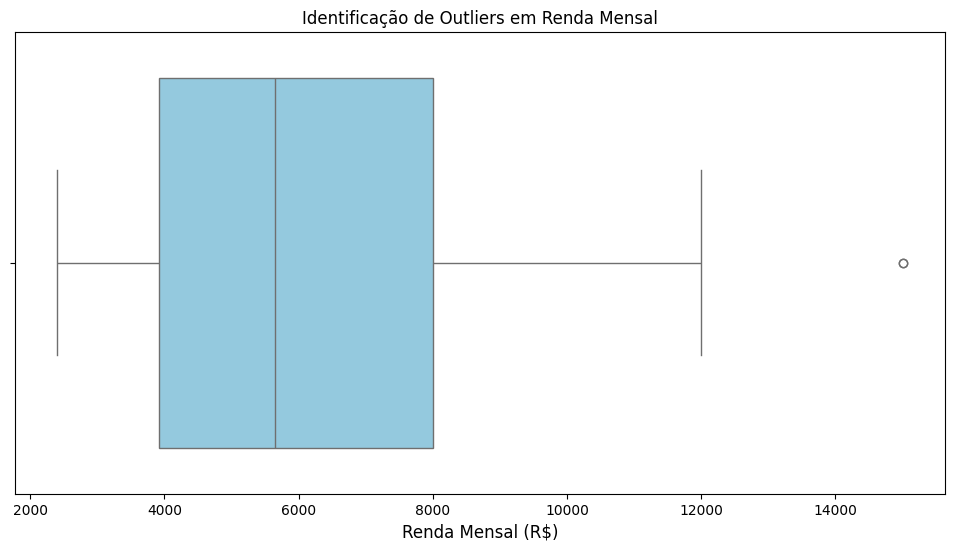

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='renda_mensal', color='skyblue')
plt.title('Identificação de Outliers em Renda Mensal')
plt.xlabel('Renda Mensal (R$)', fontsize=12)
plt.show()

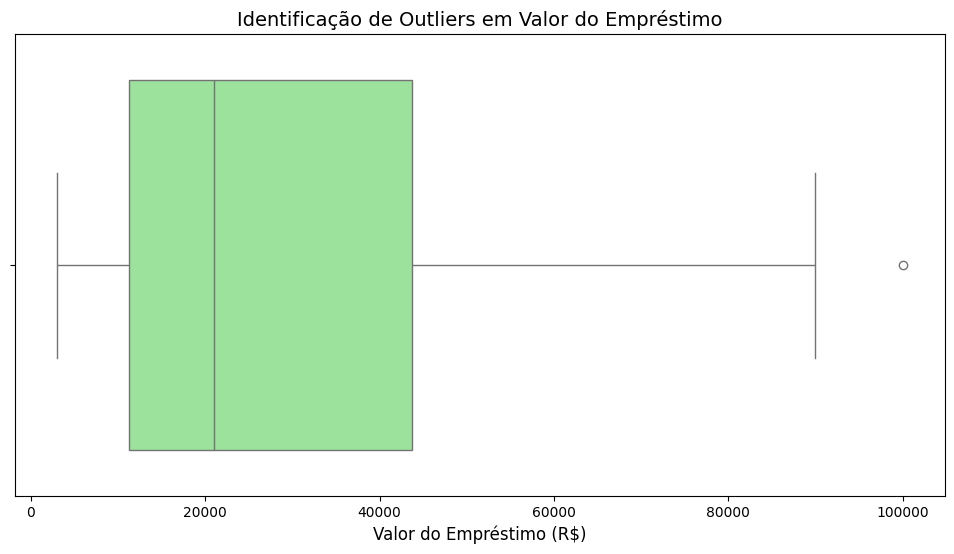

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='valor_emprestimo', color='lightgreen')
plt.title('Identificação de Outliers em Valor do Empréstimo', fontsize=14)
plt.xlabel('Valor do Empréstimo (R$)', fontsize=12)
plt.show()

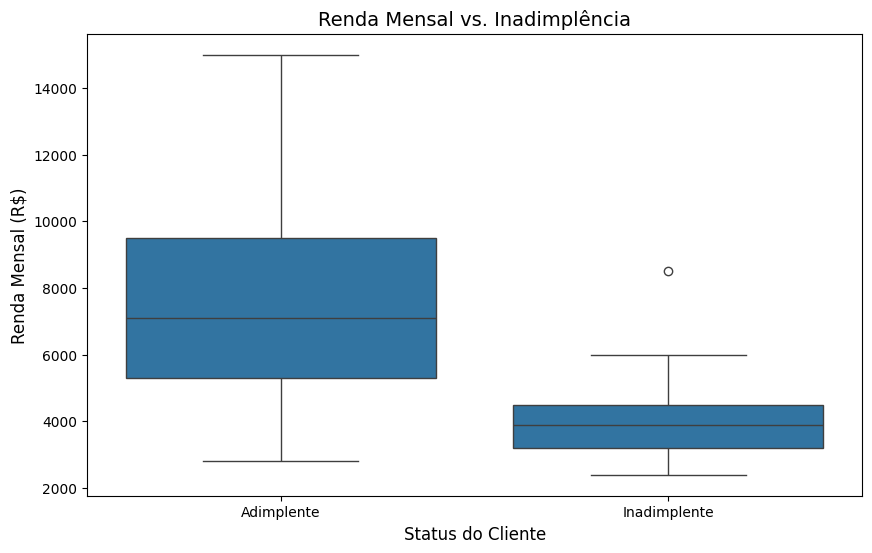

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='alvo_inadimplente', y='renda_mensal')
plt.title('Renda Mensal vs. Inadimplência', fontsize=14)
plt.xticks([0, 1], ['Adimplente', 'Inadimplente']) 
plt.xlabel('Status do Cliente', fontsize=12)
plt.ylabel('Renda Mensal (R$)', fontsize=12)
plt.show()

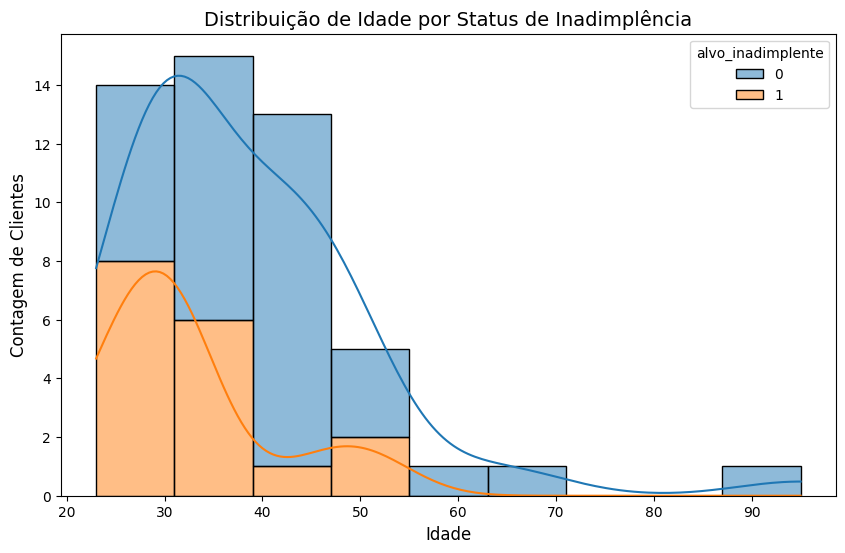

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='idade', hue='alvo_inadimplente', kde ='true', multiple="stack")
plt.title('Distribuição de Idade por Status de Inadimplência', fontsize=14)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Contagem de Clientes', fontsize=12)
plt.show()

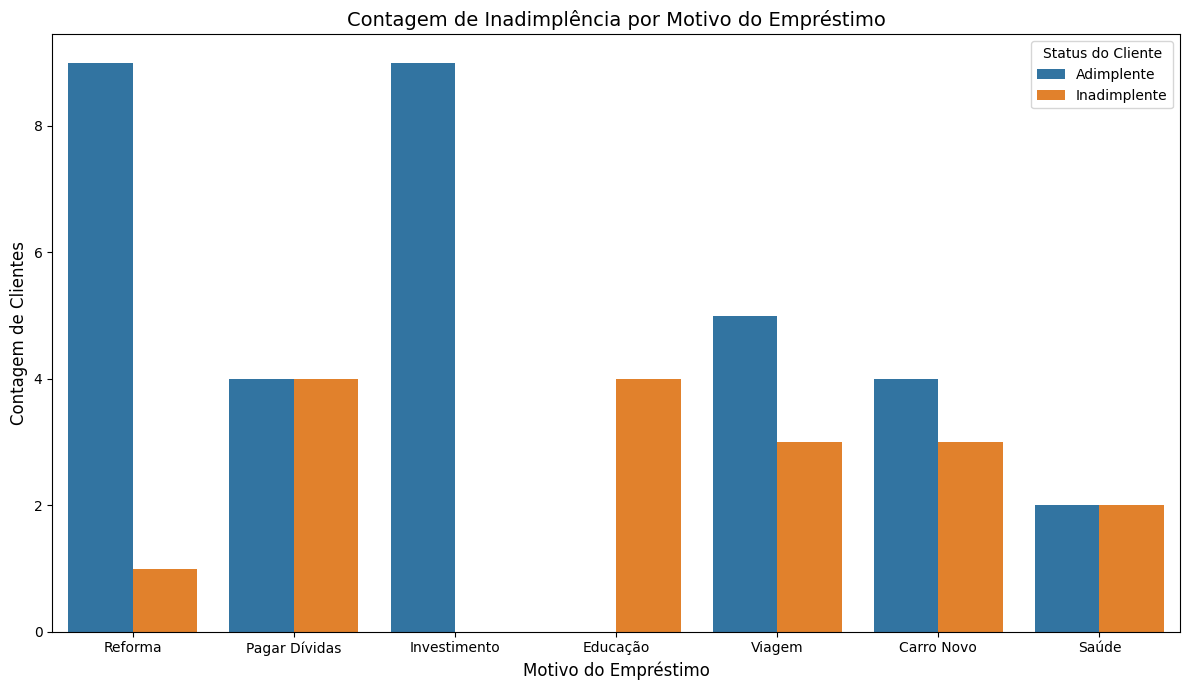

In [22]:
mapa_correcao_motivo = {
        'EducaÃ§Ã£o': 'Educação',
        'SaÃºde': 'Saúde',
        'Pagar DÃ­vidas': 'Pagar Dívidas'
    }
    
df['motivo_emprestimo'] = df['motivo_emprestimo'].replace(mapa_correcao_motivo)

plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='motivo_emprestimo', hue='alvo_inadimplente')
plt.title('Contagem de Inadimplência por Motivo do Empréstimo', fontsize=14)
plt.xlabel('Motivo do Empréstimo', fontsize=12)
plt.ylabel('Contagem de Clientes', fontsize=12)
plt.legend(title='Status do Cliente', labels=['Adimplente', 'Inadimplente'])
plt.tight_layout()
plt.show()

In [23]:
y = df['alvo_inadimplente']
X = df.drop('alvo_inadimplente', axis=1)

colunas_de_texto = ['motivo_emprestimo', 'estado_civil', 'estado']
X_numerico = pd.get_dummies(X, columns=colunas_de_texto, drop_first=True)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_numerico, y, test_size=0.3, random_state=42, stratify=y)

modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

c:\Users\s5059771\Documents\ProjetoPortifolio\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [14]:
previsoes = modelo.predict(X_test)
acuracia = accuracy_score(y_test, previsoes)

print(f"Previsões do modelo: {previsoes}")
print(f"Respostas Reais:   {y_test.values}")
print(f"\nAcurácia do modelo: {acuracia:.2%}")

Previsões do modelo: [0 0 0 1 1 0 1 0 0 1 1 0 0 0 1]
Respostas Reais:   [0 0 0 1 1 0 1 0 0 1 0 0 0 0 1]

Acurácia do modelo: 93.33%
